In [1]:
#!/Users/swp7563/Anaconda3/envs/hddmEnv/Scripts
import pandas as pd
import matplotlib.pyplot as plt

import hddm

C:\Users\swp7563\Anaconda3\envs\hddmEnv\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
data=hddm.load_csv('C:/Users/swp7563/Anaconda3/envs/hddmEnv/data/ant_ddm.csv')

data.head(10)

,subj_idx,stim,rt,response,threat,group
0,3,congruent,0.407,1,NS,HC
1,3,congruent,0.470,1,NS,HC
2,3,congruent,0.483,1,NS,HC
3,3,incongruent,-999.000,0,NS,HC
4,3,congruent,0.466,1,NS,HC
5,3,incongruent,0.487,1,NS,HC
6,3,congruent,0.477,1,NS,HC
7,3,congruent,0.577,1,NS,HC
8,3,congruent,0.550,1,NS,HC
9,3,congruent,0.454,1,NS,HC


In [4]:
model_stim=hddm.HDDM(data, depends_on={'v': 'stim'}, p_outlier=.05)
model_stim.find_starting_values()
model_stim.sample(2000, burn=20)

C:\Users\swp7563\Anaconda3\envs\hddmEnv\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2001 of 2000 complete in 3084.6 sec

In [13]:
stats = model_stim.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'a_subj.3', 'a_subj.4'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.82533,0.0574815,1.71881,1.78698,1.82199,1.86319,1.93902,0.00200758
a_std,0.485115,0.0478604,0.402995,0.451567,0.480558,0.514922,0.592828,0.00224123
a_subj.3,1.2152,0.0636584,1.10245,1.16922,1.21188,1.25851,1.33811,0.00331402
a_subj.4,2.03619,0.160336,1.73325,1.92717,2.02628,2.14405,2.36046,0.0119961


In [8]:
v_congruent, v_incongruent = model_stim.nodes_db.node[['v(congruent)', 'v(incongruent)']]

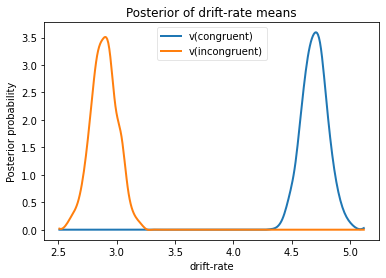

In [10]:
hddm.analyze.plot_posterior_nodes([v_congruent, v_incongruent])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate means')
plt.savefig('hddm_stim_con_vs_incon.pdf')

In [23]:
"P(congruent > incongruent) = ", (v_congruent.trace() > v_incongruent.trace()).mean()

('P(congruent > incongruent) = ', 1.0)

In [24]:
"P(incongruent > congruent) = ", (v_incongruent.trace() > v_congruent.trace()).mean()

('P(incongruent > congruent) = ', 0.0)